In [1]:
%matplotlib inline
from pandas import Series,DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl

### 1. pandas对象

**1.1 Series**

通过传递数值列表，创建一个Series对象，该对象将自动创建一个与列表类似的索引

In [3]:
s = pd.Series([1,3,5,np.nan,6,8],dtype='float')

In [4]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

**1.2 data_range**

创建时间索引

In [5]:
dates = pd.date_range('20130101', periods=6)

In [6]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

**1.3 DataFrame**

- 传递二维数组、datetime索引和列标签，创建一个DataFrame对象

In [7]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=['A','B','C','D'])

In [8]:
df

,A,B,C,D
2013-01-01,-1.652401,0.414180,0.628961,-0.025948
2013-01-02,0.501275,0.447522,1.883677,-0.200489
2013-01-03,1.223062,0.385522,0.548581,-0.520177
2013-01-04,-0.323350,-0.726353,0.354072,-1.527534
2013-01-05,-1.050343,0.389112,-1.095232,1.048869
2013-01-06,-1.121109,-1.470960,-1.202971,-1.498334


- 由字典创建DataFrame对象

In [9]:
df_dict = { 'A' : 1.,
            'B' : pd.Timestamp('20130102'),
            'C' : pd.Series(1,index=range(4),dtype='float32'),
            'D' : np.array([3] * 4,dtype='int32'),
            'E' : pd.Categorical(["test","train","test","train"]),
            'F' : 'foo'}

df2 = pd.DataFrame(df_dict)

In [10]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


### 2. 查看数据

In [11]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [12]:
df.head(3)

,A,B,C,D
2013-01-01,-1.652401,0.414180,0.628961,-0.025948
2013-01-02,0.501275,0.447522,1.883677,-0.200489
2013-01-03,1.223062,0.385522,0.548581,-0.520177


In [13]:
df.tail(3)

,A,B,C,D
2013-01-04,-0.323350,-0.726353,0.354072,-1.527534
2013-01-05,-1.050343,0.389112,-1.095232,1.048869
2013-01-06,-1.121109,-1.470960,-1.202971,-1.498334


In [14]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [15]:
df.columns

Index([u'A', u'B', u'C', u'D'], dtype='object')

In [16]:
df.values

array([[-1.65240062,  0.41418043,  0.62896115, -0.02594768],
       [ 0.50127546,  0.44752228,  1.88367747, -0.20048911],
       [ 1.22306243,  0.38552168,  0.54858108, -0.52017673],
       [-0.32334975, -0.72635261,  0.35407246, -1.52753429],
       [-1.05034283,  0.38911175, -1.09523223,  1.04886853],
       [-1.12110868, -1.47096048, -1.20297078, -1.49833357]])

In [17]:
df.describe() #数据的描述

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.403811,-0.093496,0.186182,-0.453935
std,1.092142,0.813722,1.166948,0.975049
min,-1.652401,-1.470960,-1.202971,-1.527534
25%,-1.103417,-0.448384,-0.732906,-1.253794
50%,-0.686846,0.387317,0.451327,-0.360333
75%,0.295119,0.407913,0.608866,-0.069583
max,1.223062,0.447522,1.883677,1.048869


In [18]:
df.T #转置

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,-1.652401,0.501275,1.223062,-0.323350,-1.050343,-1.121109
B,0.414180,0.447522,0.385522,-0.726353,0.389112,-1.470960
C,0.628961,1.883677,0.548581,0.354072,-1.095232,-1.202971
D,-0.025948,-0.200489,-0.520177,-1.527534,1.048869,-1.498334


In [19]:
df.sort_index(axis=1, ascending=False) #根据轴排序

,D,C,B,A
2013-01-01,-0.025948,0.628961,0.414180,-1.652401
2013-01-02,-0.200489,1.883677,0.447522,0.501275
2013-01-03,-0.520177,0.548581,0.385522,1.223062
2013-01-04,-1.527534,0.354072,-0.726353,-0.323350
2013-01-05,1.048869,-1.095232,0.389112,-1.050343
2013-01-06,-1.498334,-1.202971,-1.470960,-1.121109


In [20]:
df.sort_values(by='B',ascending=False) #根据值排序

,A,B,C,D
2013-01-02,0.501275,0.447522,1.883677,-0.200489
2013-01-01,-1.652401,0.414180,0.628961,-0.025948
2013-01-05,-1.050343,0.389112,-1.095232,1.048869
2013-01-03,1.223062,0.385522,0.548581,-0.520177
2013-01-04,-0.323350,-0.726353,0.354072,-1.527534
2013-01-06,-1.121109,-1.470960,-1.202971,-1.498334


### 3. 读取数据

In [21]:
df['A'] #读取特定列

2013-01-01   -1.652401
2013-01-02    0.501275
2013-01-03    1.223062
2013-01-04   -0.323350
2013-01-05   -1.050343
2013-01-06   -1.121109
Freq: D, Name: A, dtype: float64

In [22]:
df.loc[dates[0]] #取出特定行

A   -1.652401
B    0.414180
C    0.628961
D   -0.025948
Name: 2013-01-01 00:00:00, dtype: float64

In [23]:
df.loc[dates[0:3]] #切特定行

,A,B,C,D
2013-01-01,-1.652401,0.414180,0.628961,-0.025948
2013-01-02,0.501275,0.447522,1.883677,-0.200489
2013-01-03,1.223062,0.385522,0.548581,-0.520177


In [24]:
df[0:3] #切特定行

,A,B,C,D
2013-01-01,-1.652401,0.414180,0.628961,-0.025948
2013-01-02,0.501275,0.447522,1.883677,-0.200489
2013-01-03,1.223062,0.385522,0.548581,-0.520177


- 根据标签索引与切片

In [25]:
df['20130102':'20130104'] #根据索引切特定行

,A,B,C,D
2013-01-02,0.501275,0.447522,1.883677,-0.200489
2013-01-03,1.223062,0.385522,0.548581,-0.520177
2013-01-04,-0.323350,-0.726353,0.354072,-1.527534


In [26]:
df.loc[:,['A','B']]

,A,B
2013-01-01,-1.652401,0.414180
2013-01-02,0.501275,0.447522
2013-01-03,1.223062,0.385522
2013-01-04,-0.323350,-0.726353
2013-01-05,-1.050343,0.389112
2013-01-06,-1.121109,-1.470960


In [27]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,0.501275,0.447522
2013-01-03,1.223062,0.385522
2013-01-04,-0.323350,-0.726353


In [28]:
df.loc[dates[0],'A'] #获取某一数据点：第1行A列对应的数据

-1.6524006199479437

In [29]:
df.at[dates[0],'A'] #或则

-1.6524006199479437

- 根据位置索引与切片

In [30]:
df.iloc[3]

A   -0.323350
B   -0.726353
C    0.354072
D   -1.527534
Name: 2013-01-04 00:00:00, dtype: float64

In [31]:
df.iloc[3:5,0:2] #与numpy类似，取第4,5行，第1,2列的数据

,A,B
2013-01-04,-0.323350,-0.726353
2013-01-05,-1.050343,0.389112


In [32]:
df.iloc[[1,2,4],[0,2]] #取第2,3,5行,第1,3列的数据

,A,C
2013-01-02,0.501275,1.883677
2013-01-03,1.223062,0.548581
2013-01-05,-1.050343,-1.095232


In [33]:
df.iloc[1,1] #取第2行第2列的值

0.44752227769351915

In [34]:
df.iat[1,1]

0.44752227769351915

- 根据布尔值切片

In [35]:
df[df.A > 0]

,A,B,C,D
2013-01-02,0.501275,0.447522,1.883677,-0.200489
2013-01-03,1.223062,0.385522,0.548581,-0.520177


- isin() 判断行是否包含特定值

In [36]:
df2 = df.copy() #返回df的一个copy
df2['E'] = ['one', 'one','two','three','four','three'] #添加列名为'E'的列

In [37]:
df2

,A,B,C,D,E
2013-01-01,-1.652401,0.414180,0.628961,-0.025948,one
2013-01-02,0.501275,0.447522,1.883677,-0.200489,one
2013-01-03,1.223062,0.385522,0.548581,-0.520177,two
2013-01-04,-0.323350,-0.726353,0.354072,-1.527534,three
2013-01-05,-1.050343,0.389112,-1.095232,1.048869,four
2013-01-06,-1.121109,-1.470960,-1.202971,-1.498334,three


In [38]:
df2['E'].isin(['one','four']) #判断'E'列中包含'one'或'four'的

2013-01-01     True
2013-01-02     True
2013-01-03    False
2013-01-04    False
2013-01-05     True
2013-01-06    False
Freq: D, Name: E, dtype: bool

In [39]:
df2[df2['E'].isin(['one','four'])] #取对应为True的行

,A,B,C,D,E
2013-01-01,-1.652401,0.414180,0.628961,-0.025948,one
2013-01-02,0.501275,0.447522,1.883677,-0.200489,one
2013-01-05,-1.050343,0.389112,-1.095232,1.048869,four


### 4. 更新或添加数据

- 添加1列

In [40]:
s1 = pd.Series([1,2,3,4,5,6],index=pd.date_range('20130103', periods=6))

In [41]:
df['F'] = s1 #根据索引值添加数据

In [42]:
df

,A,B,C,D,F
2013-01-01,-1.652401,0.414180,0.628961,-0.025948,NaN
2013-01-02,0.501275,0.447522,1.883677,-0.200489,NaN
2013-01-03,1.223062,0.385522,0.548581,-0.520177,1.0
2013-01-04,-0.323350,-0.726353,0.354072,-1.527534,2.0
2013-01-05,-1.050343,0.389112,-1.095232,1.048869,3.0
2013-01-06,-1.121109,-1.470960,-1.202971,-1.498334,4.0


- 根据标签重新设定值

In [43]:
df.at[dates[0],'A'] = 0

In [44]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.414180,0.628961,-0.025948,NaN
2013-01-02,0.501275,0.447522,1.883677,-0.200489,NaN
2013-01-03,1.223062,0.385522,0.548581,-0.520177,1.0
2013-01-04,-0.323350,-0.726353,0.354072,-1.527534,2.0
2013-01-05,-1.050343,0.389112,-1.095232,1.048869,3.0
2013-01-06,-1.121109,-1.470960,-1.202971,-1.498334,4.0


- 根据索引重新设定值

In [45]:
df.iat[0,0] = 1

In [46]:
df

,A,B,C,D,F
2013-01-01,1.000000,0.414180,0.628961,-0.025948,NaN
2013-01-02,0.501275,0.447522,1.883677,-0.200489,NaN
2013-01-03,1.223062,0.385522,0.548581,-0.520177,1.0
2013-01-04,-0.323350,-0.726353,0.354072,-1.527534,2.0
2013-01-05,-1.050343,0.389112,-1.095232,1.048869,3.0
2013-01-06,-1.121109,-1.470960,-1.202971,-1.498334,4.0


- 设定列值

In [47]:
df.loc['2013-01-01':'2013-01-04','D'] = np.array([0] * 4)

In [48]:
df

,A,B,C,D,F
2013-01-01,1.000000,0.414180,0.628961,0.000000,NaN
2013-01-02,0.501275,0.447522,1.883677,0.000000,NaN
2013-01-03,1.223062,0.385522,0.548581,0.000000,1.0
2013-01-04,-0.323350,-0.726353,0.354072,0.000000,2.0
2013-01-05,-1.050343,0.389112,-1.095232,1.048869,3.0
2013-01-06,-1.121109,-1.470960,-1.202971,-1.498334,4.0


In [49]:
df['D'] = pd.Series([1,2,3,4,5,6],index=pd.date_range('20130101', periods=6))

In [50]:
df

,A,B,C,D,F
2013-01-01,1.000000,0.414180,0.628961,1,NaN
2013-01-02,0.501275,0.447522,1.883677,2,NaN
2013-01-03,1.223062,0.385522,0.548581,3,1.0
2013-01-04,-0.323350,-0.726353,0.354072,4,2.0
2013-01-05,-1.050343,0.389112,-1.095232,5,3.0
2013-01-06,-1.121109,-1.470960,-1.202971,6,4.0


In [51]:
df2 = df.copy()
df2[df2 > 0] = -df2

In [52]:
df2

,A,B,C,D,F
2013-01-01,-1.000000,-0.414180,-0.628961,-1,NaN
2013-01-02,-0.501275,-0.447522,-1.883677,-2,NaN
2013-01-03,-1.223062,-0.385522,-0.548581,-3,-1.0
2013-01-04,-0.323350,-0.726353,-0.354072,-4,-2.0
2013-01-05,-1.050343,-0.389112,-1.095232,-5,-3.0
2013-01-06,-1.121109,-1.470960,-1.202971,-6,-4.0


### 5. 空值的处理

In [53]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])

In [54]:
df1.loc[dates[0]:dates[2],'E'] = 1

In [55]:
df1

,A,B,C,D,F,E
2013-01-01,1.000000,0.414180,0.628961,1,NaN,1.0
2013-01-02,0.501275,0.447522,1.883677,2,NaN,1.0
2013-01-03,1.223062,0.385522,0.548581,3,1.0,1.0
2013-01-04,-0.323350,-0.726353,0.354072,4,2.0,NaN


In [56]:
df1.dropna(how='any') #丢弃包含任意空值的行

,A,B,C,D,F,E
2013-01-03,1.223062,0.385522,0.548581,3,1.0,1.0


In [57]:
df1.fillna(value=5) #在空值处填充5

,A,B,C,D,F,E
2013-01-01,1.000000,0.414180,0.628961,1,5.0,1.0
2013-01-02,0.501275,0.447522,1.883677,2,5.0,1.0
2013-01-03,1.223062,0.385522,0.548581,3,1.0,1.0
2013-01-04,-0.323350,-0.726353,0.354072,4,2.0,5.0


In [58]:
df1.isnull() #.isnull()获取对应位置是否为空的判断

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,True,False
2013-01-03,False,False,False,False,False,False
2013-01-04,False,False,False,False,False,True


In [59]:
np.nan == np.nan

False

### 6. 描述性统计

In [138]:
df

,A,B,C,D,F
2013-01-01,1.000000,-0.442295,0.536774,0,NaN
2013-01-02,0.621751,-0.342947,-0.588593,0,NaN
2013-01-03,-0.401506,2.917764,0.316424,0,1.0
2013-01-04,0.534511,1.269203,2.056769,0,2.0
2013-01-05,0.218189,0.791400,0.924779,5,3.0
2013-01-06,-1.222266,-0.669498,2.341119,6,4.0


In [136]:
df.mean() #每一列去除空值后再求平均

A    0.125113
B    0.587271
C    0.931212
D    1.833333
F    2.500000
dtype: float64

In [137]:
df.mean(1) #根据行求平均

2013-01-01    0.273620
2013-01-02   -0.077447
2013-01-03    0.766536
2013-01-04    1.172097
2013-01-05    1.986874
2013-01-06    2.089871
Freq: D, dtype: float64

In [141]:
df.std() #标准差

A    0.810074
B    1.374240
C    1.104365
D    2.857738
F    1.290994
dtype: float64

In [140]:
df.std(1)

2013-01-01    0.628299
2013-01-02    0.524924
2013-01-03    1.307363
2013-01-04    0.902472
2013-01-05    1.986882
2013-01-06    3.065338
Freq: D, dtype: float64

- apply应用函数

In [143]:
df.apply(np.cumsum) #累加

,A,B,C,D,F
2013-01-01,1.000000,-0.442295,0.536774,0,NaN
2013-01-02,1.621751,-0.785241,-0.051819,0,NaN
2013-01-03,1.220245,2.132523,0.264605,0,1.0
2013-01-04,1.754756,3.401726,2.321373,0,3.0
2013-01-05,1.972945,4.193126,3.246153,5,6.0
2013-01-06,0.750679,3.523628,5.587272,11,10.0


In [144]:
df.apply(np.cumprod) #累乘

,A,B,C,D,F
2013-01-01,1.000000,-0.442295,0.536774,0,NaN
2013-01-02,0.621751,0.151683,-0.315942,0,NaN
2013-01-03,-0.249637,0.442577,-0.099971,0,1.0
2013-01-04,-0.133434,0.561719,-0.205618,0,2.0
2013-01-05,-0.029114,0.444545,-0.190151,0,6.0
2013-01-06,0.035585,-0.297622,-0.445167,0,24.0


### 7. 不同DataFrame的融合

- contatenate

In [148]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,1.210357,0.275712,1.499001,0.508583
1,1.112550,1.109700,-0.297843,-0.916822
2,0.513849,-0.267650,0.079525,0.383524
3,0.289503,-0.157907,-0.782206,0.199017
4,1.681868,0.181961,1.851726,-1.280173
5,-0.940935,-0.013001,0.992847,-0.733483
6,0.597612,0.096399,1.033584,-1.422748
7,0.461741,0.803575,-0.679986,-0.111865
8,1.376966,1.274416,0.368291,-1.174016
9,-0.755643,0.142048,0.948586,-0.052778


In [150]:
pieces = [df[:3], df[5:7], df[7:]]

In [151]:
pd.concat(pieces)

,0,1,2,3
0,1.210357,0.275712,1.499001,0.508583
1,1.112550,1.109700,-0.297843,-0.916822
2,0.513849,-0.267650,0.079525,0.383524
5,-0.940935,-0.013001,0.992847,-0.733483
6,0.597612,0.096399,1.033584,-1.422748
7,0.461741,0.803575,-0.679986,-0.111865
8,1.376966,1.274416,0.368291,-1.174016
9,-0.755643,0.142048,0.948586,-0.052778


- join 连接

In [152]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [153]:
pd.merge(left, right, on='key') #根据key等值连接

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [154]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

In [156]:
pd.merge(left, right, on='key') #根据key等值连接

,key,lval,rval
0,foo,1,4
1,bar,2,5


- append

In [157]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])

In [160]:
df

,A,B,C,D
0,0.028684,-0.342307,2.644941,0.423276
1,0.554702,-0.190877,-0.791929,-0.342335
2,-1.121735,-0.504096,0.013850,0.354372
3,-0.400668,0.126034,-0.494874,-0.246404
4,-0.824274,-0.193413,-2.668732,0.392596
5,-0.339334,0.444518,-0.325638,1.172744
6,2.016673,0.645516,0.518519,-0.536498
7,0.932158,-0.567637,-0.367115,-1.390475


In [158]:
s = df.iloc[3]

In [162]:
df.append(s,ignore_index=True)

,A,B,C,D
0,0.028684,-0.342307,2.644941,0.423276
1,0.554702,-0.190877,-0.791929,-0.342335
2,-1.121735,-0.504096,0.013850,0.354372
3,-0.400668,0.126034,-0.494874,-0.246404
4,-0.824274,-0.193413,-2.668732,0.392596
5,-0.339334,0.444518,-0.325638,1.172744
6,2.016673,0.645516,0.518519,-0.536498
7,0.932158,-0.567637,-0.367115,-1.390475
8,-0.400668,0.126034,-0.494874,-0.246404


### 8. 绘图

In [179]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

In [180]:
ts = ts.cumsum()

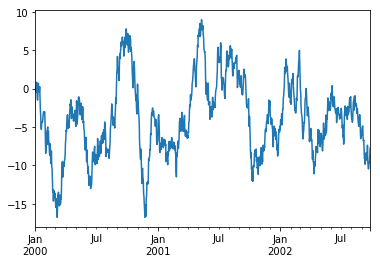

In [181]:
ts.plot()

In [182]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=['A', 'B', 'C', 'D'])

In [183]:
df = df.cumsum()

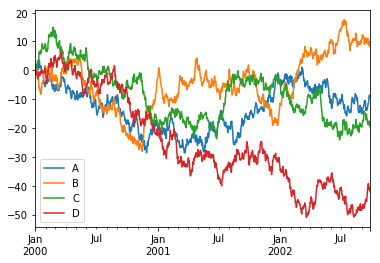

In [186]:
pl.figure()
df.plot()
pl.legend(loc='best')

### 9. INPUT/OUTPUT

- csv文件

In [189]:
df.head()

,A,B,C,D
2000-01-01,1.448938,0.193952,0.239359,-0.016934
2000-01-02,1.180984,1.535383,1.019862,0.336586
2000-01-03,1.309072,-0.665678,1.980006,-1.328137
2000-01-04,0.898818,-0.059611,1.077945,-0.565709
2000-01-05,2.142085,0.558202,1.076904,-0.463829


In [192]:
path = '/Users/xiaoyu/Documents'

In [222]:
df.to_csv(path+'/foo1.csv')

In [216]:
df2 = pd.read_csv(path+'/foo1.csv', index_col=0, parse_dates=True) #Use a column as an index, and parse it as dates.

In [217]:
df2.head()

,A,B,C,D
2000-01-01,1.448938,0.193952,0.239359,-0.016934
2000-01-02,1.180984,1.535383,1.019862,0.336586
2000-01-03,1.309072,-0.665678,1.980006,-1.328137
2000-01-04,0.898818,-0.059611,1.077945,-0.565709
2000-01-05,2.142085,0.558202,1.076904,-0.463829


In [218]:
df2.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2002-09-17', '2002-09-18', '2002-09-19', '2002-09-20',
               '2002-09-21', '2002-09-22', '2002-09-23', '2002-09-24',
               '2002-09-25', '2002-09-26'],
              dtype='datetime64[ns]', length=1000, freq=None)

- excel文件

In [224]:
df.to_excel(path+'/foo2.xlsx', sheet_name='Sheet1')

In [225]:
df3 = pd.read_excel(path+'/foo2.xlsx', 'Sheet1', index_col=0, na_values=['NA'])

In [226]:
df3.head()

,A,B,C,D
2000-01-01,1.448938,0.193952,0.239359,-0.016934
2000-01-02,1.180984,1.535383,1.019862,0.336586
2000-01-03,1.309072,-0.665678,1.980006,-1.328137
2000-01-04,0.898818,-0.059611,1.077945,-0.565709
2000-01-05,2.142085,0.558202,1.076904,-0.463829


In [227]:
df3.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2002-09-17', '2002-09-18', '2002-09-19', '2002-09-20',
               '2002-09-21', '2002-09-22', '2002-09-23', '2002-09-24',
               '2002-09-25', '2002-09-26'],
              dtype='datetime64[ns]', length=1000, freq=None)

### 10. 时间序列

In [60]:
rng = pd.date_range('1/1/2011', periods=72, freq='H')

In [61]:
rng[:5]

DatetimeIndex(['2011-01-01 00:00:00', '2011-01-01 01:00:00',
               '2011-01-01 02:00:00', '2011-01-01 03:00:00',
               '2011-01-01 04:00:00'],
              dtype='datetime64[ns]', freq='H')

In [62]:
rng = pd.date_range('1/1/2011', periods=72, freq='D')

In [63]:
rng[:5]

DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05'],
              dtype='datetime64[ns]', freq='D')

In [66]:
ts = pd.Series(np.random.randn(len(rng)), index=pd.date_range('1/1/2011', periods=72, freq='H'))

In [67]:
ts.head()

2011-01-01 00:00:00    0.536819
2011-01-01 01:00:00   -0.571356
2011-01-01 02:00:00    0.677635
2011-01-01 03:00:00   -0.702659
2011-01-01 04:00:00   -0.109048
Freq: H, dtype: float64

In [74]:
converted = ts.asfreq('1min', method='pad')

In [75]:
converted.head()

2011-01-01 00:00:00    0.536819
2011-01-01 00:01:00    0.536819
2011-01-01 00:02:00    0.536819
2011-01-01 00:03:00    0.536819
2011-01-01 00:04:00    0.536819
Freq: T, dtype: float64

In [78]:
ts.resample('D').mean()

2011-01-01   -0.217521
2011-01-02   -0.447757
2011-01-03   -0.175689
Freq: D, dtype: float64